In [1]:
import numpy as np
import cv2
from utilities import *
from datagen import DataGenerator
from transformations import *
import matplotlib.pyplot as plt

transform = transforms.Compose([
        transforms.ToTensor()
    ])

img_folder = 'hw2_train_val/train15000/'
data = DataGenerator(parent_dir=img_folder, img_size=448, S=7, B=2, C=16, transform=transform, num = 1000)


 500  1000 

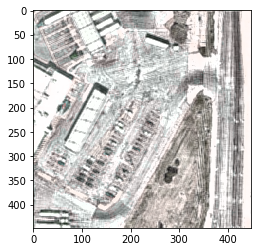

In [2]:
name, img, targets = data.__getitem__(124)
img_show = img.permute(1,2,0)

plt.figure(1)
plt.imshow(img_show)


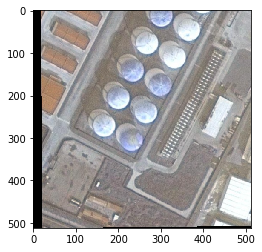

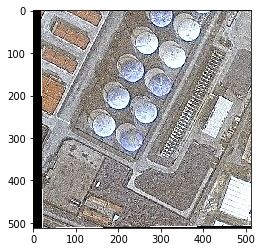

In [3]:
image = data.imgs[611]
plt.figure(8)
plt.imshow(image)

plt.figure(7)
image_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
image_to_yuv[0,:,:] = cv2.filter2D(image_to_yuv[0,:,:], -1, kernel_sharpening)
image_to_yuv[:,0,:] = cv2.filter2D(image_to_yuv[:,0,:], -1, kernel_sharpening)
image_to_yuv[:,:,0] = cv2.filter2D(image_to_yuv[:,:,0], -1, kernel_sharpening)

sharpened = cv2.cvtColor(image_to_yuv, cv2.COLOR_YUV2BGR)
plt.imshow(sharpened)

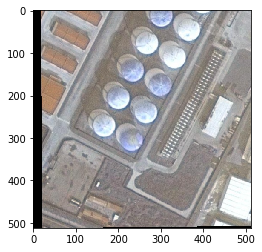

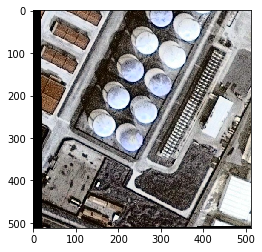

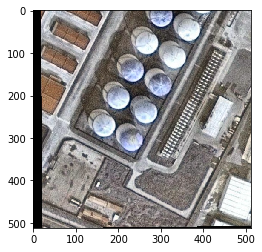

In [4]:

plt.figure(4)

plt.imshow(image)

# ======== GHE =============
plt.figure(5)
image_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
image_to_yuv[:,:,0] = cv2.equalizeHist(image_to_yuv[:,:,0])
image_to_yuv[:,0,:] = cv2.equalizeHist(image_to_yuv[:,0,:])
image_to_yuv[0,:,:] = cv2.equalizeHist(image_to_yuv[0,:,:])
hist_equalization_result = cv2.cvtColor(image_to_yuv, cv2.COLOR_YUV2BGR)
plt.imshow(hist_equalization_result)

plt.figure(6)
image_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_to_yuv[:,:,0] = clahe.apply(image_to_yuv[:,:,0])
image_to_yuv[:,0,:] = clahe.apply(image_to_yuv[:,0,:])
image_to_yuv[0,:,:] = clahe.apply(image_to_yuv[0,:,:])
adaptiveHE1 = cv2.cvtColor(image_to_yuv, cv2.COLOR_YUV2BGR)
plt.imshow(adaptiveHE1)